In [18]:
# Data overview - D1
import pandas as pd
import numpy as np

file_path = "CAISO_zone_1_.csv"
df = pd.read_csv(file_path)

# Display dataset structure
print("Dataset Structure:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Compute range, mean, and standard deviation for each column
print("\nStatistical Summary:")
stats = df.describe().T  # Transpose for better readability
stats["range"] = stats["max"] - stats["min"]
stats = stats[["min", "max", "range", "mean", "std"]]
print(stats)

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573923 entries, 0 to 1573922
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   time                1573923 non-null  object 
 1   load_power          1573923 non-null  float64
 2   wind_power          1573923 non-null  float64
 3   solar_power         1573923 non-null  float64
 4   DHI                 1573923 non-null  float64
 5   DNI                 1573923 non-null  float64
 6   GHI                 1573923 non-null  float64
 7   Dew Point           1573923 non-null  float64
 8   Solar Zenith Angle  1573923 non-null  float64
 9   Wind Speed          1573923 non-null  float64
 10  Relative Humidity   1573923 non-null  float64
 11  Temperature         1573923 non-null  float64
dtypes: float64(11), object(1)
memory usage: 144.1+ MB
None

Missing Values:
time                  0
load_power            0
wind_power            0
solar

Image successfully saved as 'E:/Desktop/D1_Histogram.png'


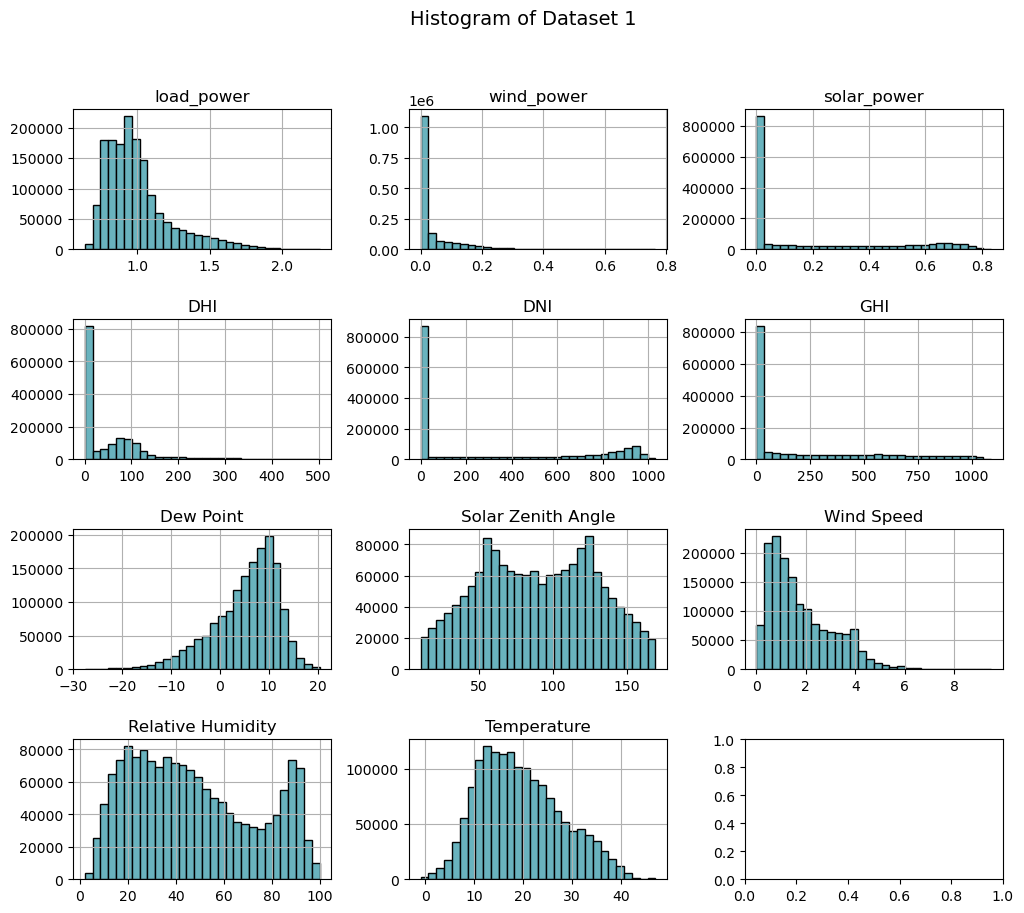

In [3]:
# Histogram plot - D1
import pandas as pd
import matplotlib.pyplot as plt

file_path = "CAISO_zone_1_.csv"
df = pd.read_csv(file_path)

# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Iterate over each numerical column and plot histograms
for i, col in enumerate(numeric_cols):
    df[col].hist(bins=30, ax=axes[i], edgecolor='black', color="#69b3be")
    axes[i].set_title(col)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Title
plt.suptitle("Histogram of Dataset 1", fontsize=14)

# Save
output_image_path = "E:/Desktop/D1_Histogram.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
print(f"Image successfully saved as '{output_image_path}'")

plt.show()

Image successfully saved as 'E:/Desktop/Standardized_Boxplot_of_Dataset_1.png'


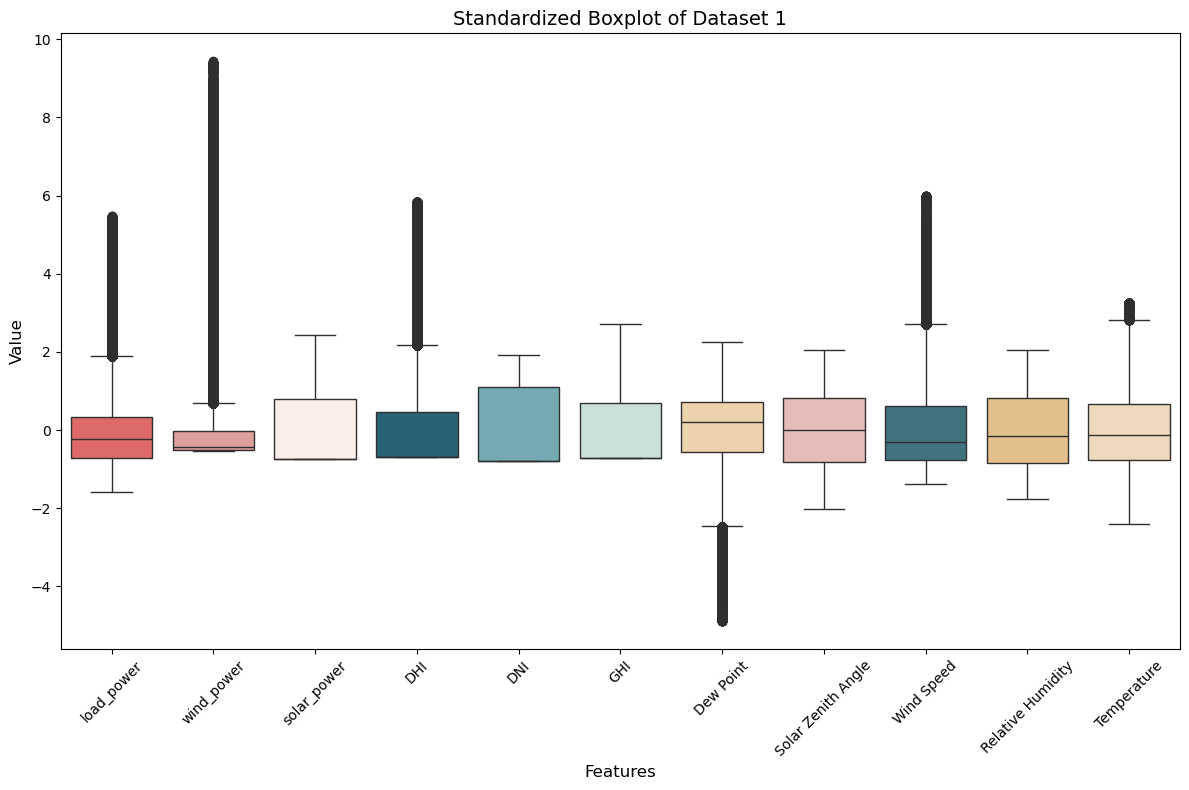

In [4]:
# Boxplot - D1
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

file_path = "CAISO_zone_1_.csv"
df = pd.read_csv(file_path)

# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Standardize data using Z-score normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Define custom color palette
custom_palette = ['#f05756', '#e69692', '#feece7', '#1e6780', '#69b3be', 
                  '#c8e2dd', '#f8d5a0', '#edb6b3', '#377989', '#f0c27d', '#f4dbb5']

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled, orient='v', palette=custom_palette)
plt.title("Standardized Boxplot of Dataset 1", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save
output_image_path = "E:/Desktop/Standardized_Boxplot_of_Dataset_1.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight', format='png')
print(f"Image successfully saved as '{output_image_path}'")

plt.show()

In [25]:
# Data overview - D2
import pandas as pd
import numpy as np

file_path = '69015093121.csv'
df = pd.read_csv(file_path)

# Rename columns
df.rename(columns={"DATE": "Date"}, inplace=True)

# Extract specific columns and create a copy
columns_to_extract = ["SLP", "STP", "VISIB", "PRCP", "SNDP", "FRSHTT", "Date"]
extracted_df = df[columns_to_extract].copy()

# Replace missing values in specified columns
extracted_df.loc[:, 'SLP'] = extracted_df['SLP'].replace(9999.9, np.nan)  # Replace 9999.9 with NaN in the SLP column
extracted_df.loc[:, 'STP'] = extracted_df['STP'].replace(9999.9, np.nan)  # Replace 9999.9 with NaN in the STP column
extracted_df.loc[:, 'VISIB'] = extracted_df['VISIB'].replace(999.9, np.nan)  # Replace 999.9 with NaN in the VISIB column
extracted_df.loc[:, 'PRCP'] = extracted_df['PRCP'].replace(99.99, 0)  # Replace 99.99 with 0 in the PRCP column
extracted_df.loc[:, 'SNDP'] = extracted_df['SNDP'].replace(999.9, 0)  # Replace 999.9 with 0 in the SNDP column

print("Data structure:")
print(extracted_df.info())

print("\nMissing values summary:")
print(extracted_df.isnull().sum())

# Compute range, mean, and standard deviation for each column
print("\nStatistical summary for each column:")
stats = extracted_df.describe().T
stats["range"] = stats["max"] - stats["min"]
stats = stats[["min", "max", "range", "mean", "std"]]
print(stats)

# Save
output_file = '69015093121_extracted.csv'
extracted_df.to_csv(output_file, index=False)

print(f"Extraction completed. Saved as {output_file}")

Data structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SLP     355 non-null    float64
 1   STP     360 non-null    float64
 2   VISIB   360 non-null    float64
 3   PRCP    360 non-null    float64
 4   SNDP    360 non-null    float64
 5   FRSHTT  360 non-null    int64  
 6   Date    360 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 19.8+ KB
None

Missing values summary:
SLP       5
STP       0
VISIB     0
PRCP      0
SNDP      0
FRSHTT    0
Date      0
dtype: int64

Statistical summary for each column:
          min        max      range         mean          std
SLP     999.8    1031.70      31.90  1013.647606     5.259488
STP     922.2     999.90      77.70   938.933889    15.011537
VISIB     6.3      10.00       3.70     9.463333     0.862619
PRCP      0.0       1.35       1.35     0.014333     0.086428
SNDP     

The image has been successfully saved as 'E:/Desktop/D2_Histogram.png'


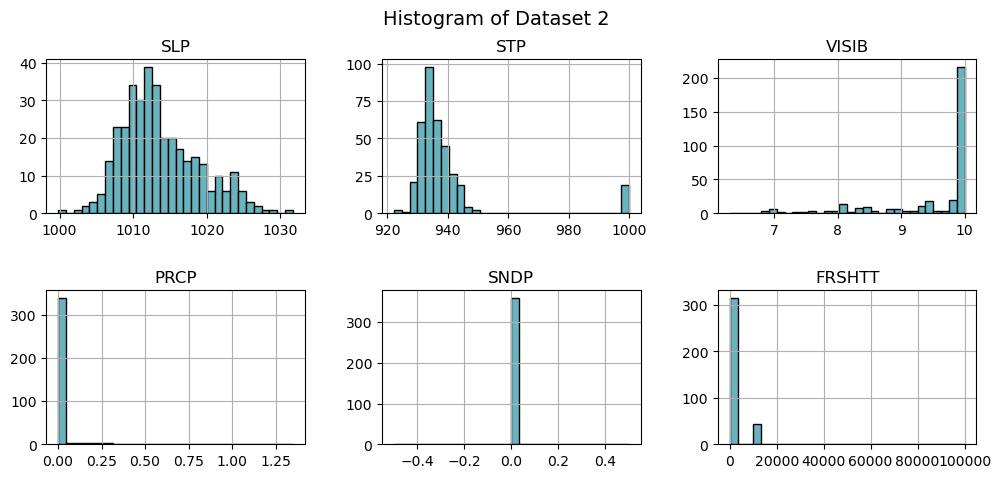

In [6]:
# Histogram plot - D2
import pandas as pd
import matplotlib.pyplot as plt

file_path = '69015093121_extracted.csv'
df = pd.read_csv(file_path)

# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))
axes = axes.flatten()

# Iterate over each numerical column and plot a histogram
for i, col in enumerate(numeric_cols):
    df[col].hist(bins=30, ax=axes[i], edgecolor='black', color="#69b3be")
    axes[i].set_title(col)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Title
plt.suptitle("Histogram of Dataset 2", fontsize=14)

# Save
output_image_path = "E:/Desktop/D2_Histogram.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
print(f"The image has been successfully saved as '{output_image_path}'")

plt.show()

The image has been successfully saved as 'E:/Desktop/Standardized_Boxplot_of_Dataset_2.png'


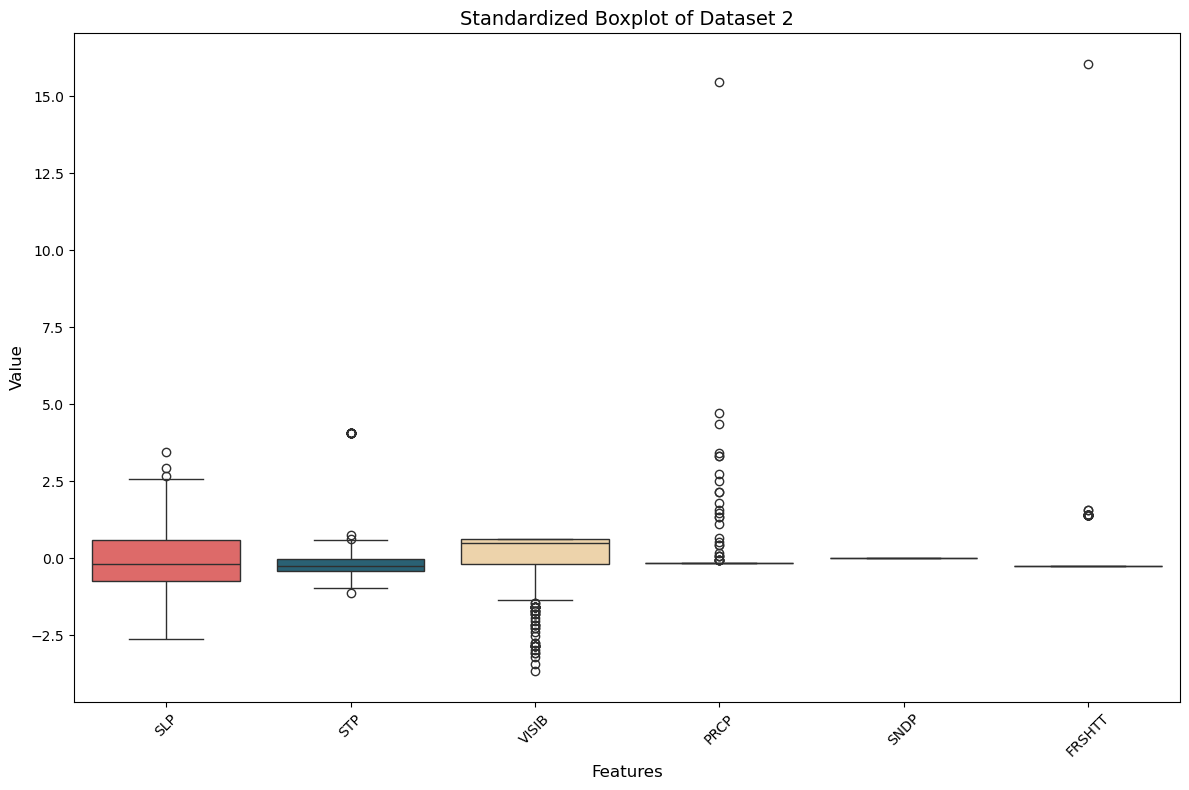

In [7]:
# Boxplot - D2
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

file_path = '69015093121_extracted.csv'
df = pd.read_csv(file_path)

# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Standardize data using Z-score normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Custom color palette
custom_palette = ['#f05756', '#1e6780', '#f8d5a0', '#e69692', '#69b3be', '#c8e2dd']

# Plot boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled, orient='v', palette=custom_palette)
plt.title("Standardized Boxplot of Dataset 2", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save
output_image_path = "E:/Desktop/Standardized_Boxplot_of_Dataset_2.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight', format='png')  
print(f"The image has been successfully saved as '{output_image_path}'")

plt.show()

In [8]:
# Data extraction - D1
import pandas as pd

file_path = "CAISO_zone_1_.csv"
df = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Filter data within the time range 2019.01.01 - 2019.12.31
filtered_df = df[(df['time'] >= '2019-01-01') & (df['time'] <= '2019-12-31')]

# Save the filtered data to a new file
output_file_path = "CAISO_zone_1_2019.csv"
filtered_df.to_csv(output_file_path, index=False)

print(f"Filtering completed. The data has been saved as '{output_file_path}'.")

Filtering completed. The data has been saved as 'CAISO_zone_1_2019.csv'.


In [10]:
# Data cleaning - D1
import pandas as pd
import numpy as np
from scipy.stats import zscore

file_path = "CAISO_zone_1_2019.csv"
df = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])

# Select all numerical columns (excluding 'time')
numeric_cols = df.columns[df.columns != 'time']

# Compute Z-score
z_scores = df[numeric_cols].apply(zscore)

# Replace values with |Z-score| > 3 with NaN (considered as outliers)
df[numeric_cols] = df[numeric_cols].mask(np.abs(z_scores) > 3)

# Perform linear interpolation for columns other than 'time'
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', axis=0)

# Save
output_file_path = "CAISO_zone_1_2019_filled.csv"
df.to_csv(output_file_path, index=False)

print(f"Outliers have been replaced with missing values and filled using interpolation. The result has been saved as '{output_file_path}'.")

Outliers have been replaced with missing values and filled using interpolation. The result has been saved as 'CAISO_zone_1_2019_filled.csv'.


In [11]:
# Aggregate - D1
import pandas as pd

file_path = "CAISO_zone_1_2019_filled.csv"
df = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])

# Compute the daily mean only for numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
daily_aggregated_df = df.groupby(df['time'].dt.date)[numeric_cols].mean().reset_index()

# Rename the 'time' column to 'Date'
daily_aggregated_df.rename(columns={'time': 'Date'}, inplace=True)
daily_aggregated_df['Date'] = pd.to_datetime(daily_aggregated_df['Date'])

# Capitalize the first letter of other column names but keep DHI, DNI, and GHI unchanged
daily_aggregated_df.columns = [
    col.capitalize() if col not in ['DHI', 'DNI', 'GHI', 'Date'] else col
    for col in daily_aggregated_df.columns
]

# Save
output_file_path = "CAISO_zone_1_2019_by_Day.csv"
daily_aggregated_df.to_csv(output_file_path, index=False)

print(f"Data has been aggregated by day and averaged. The result has been saved as '{output_file_path}'.")

Data has been aggregated by day and averaged. The result has been saved as 'CAISO_zone_1_2019_by_Day.csv'.


In [13]:
# Complete the date - D2
import pandas as pd

file_path = '69015093121_extracted.csv'
df = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Generate a complete date range for the year 2019
full_date_range = pd.date_range(start='2019-01-01', end='2019-12-31')

# Create a new DataFrame
full_df = pd.DataFrame({'Date': full_date_range})

# Merge the original data with the complete date range
merged_df = pd.merge(full_df, df, on='Date', how='left')

# Save
output_file = '69015093121_365.csv'
merged_df.to_csv(output_file, index=False)

print(f"Date completion finished. The result has been saved as '{output_file}'.")

Date completion finished. The result has been saved as '69015093121_365.csv'.


In [14]:
# Data cleaning - D2
import pandas as pd
import numpy as np
from scipy.stats import zscore

df = pd.read_csv('69015093121_365.csv')

# Compute Z-score and replace outliers with NaN (excluding the FRSHTT column)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('FRSHTT')

# Compute Z-score
z_scores = df[numeric_cols].apply(zscore)

# Replace values with |Z-score| > 3 with NaN
df[numeric_cols] = df[numeric_cols].mask(np.abs(z_scores) > 3)

# Fill missing values in the FRSHTT column using mode and ensure data type is int64
mode_value = df['FRSHTT'].mode()[0]
df['FRSHTT'] = df['FRSHTT'].fillna(mode_value).astype('int64')

# Fill missing values in other columns using linear interpolation
df.interpolate(method='linear', axis=0, inplace=True)

# Save
df.to_csv('69015093121_filled.csv', index=False)

print("Outliers have been replaced with missing values, missing values have been filled, and the result has been saved as '69015093121_filled.csv'.")

Outliers have been replaced with missing values, missing values have been filled, and the result has been saved as '69015093121_filled.csv'.


In [15]:
# Feature encoding - D2
import pandas as pd 

file_path = '69015093121_filled.csv'
df = pd.read_csv(file_path)

# Ensure the FRSHTT column is in string format and remove all non-numeric characters
df['FRSHTT'] = df['FRSHTT'].astype(str).apply(lambda x: ''.join(filter(str.isdigit, x)))

# Right-align and pad with zeros to 6 digits
df['FRSHTT'] = df['FRSHTT'].apply(lambda x: x.rjust(6, '0'))

# Create one-hot encoded columns
try:
    df['Fog'] = df['FRSHTT'].str[0].astype(int)
    df['Rain/Drizzle'] = df['FRSHTT'].str[1].astype(int)
    df['Snow/Ice Pellets'] = df['FRSHTT'].str[2].astype(int)
    df['Hail'] = df['FRSHTT'].str[3].astype(int)
    df['Thunder'] = df['FRSHTT'].str[4].astype(int)
    df['Tornado/Funnel Cloud'] = df['FRSHTT'].str[5].astype(int)
except ValueError as e:
    print(f"Data conversion error: {e}")
    print("Inspecting unique values in the 'FRSHTT' column:")
    print(df['FRSHTT'].unique())

# Remove the original FRSHTT column
df.drop(columns=['FRSHTT'], inplace=True)

# Save
output_file = '69015093121_onehot.csv'
df.to_csv(output_file, index=False)

print(f"One-hot encoding completed and saved to '{output_file}'.")

One-hot encoding completed and saved to '69015093121_onehot.csv'.


In [16]:
# Final cleaning - D2
import pandas as pd 

df = pd.read_csv('69015093121_onehot.csv')

# Remove columns with only one unique value
df = df.loc[:, df.nunique() > 1]

# Ensure float64 columns retain 2 decimal places
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].round(2)

# Ensure these columns remain as float64 type
df[float_columns] = df[float_columns].astype('float64')

# Save
df.to_csv('69015093121_cleaned.csv', index=False)

print("One-hot encoding cleaned and saved to '69015093121_cleaned.csv'.")

One-hot encoding cleaned and saved to '69015093121_cleaned.csv'.


In [17]:
# Check
import pandas as pd 

df = pd.read_csv('69015093121_cleaned.csv')

print(df.head())

# Display data structure
print("Data Structure:")
print(df.info())

         Date     SLP    STP  VISIB  PRCP  Fog  Rain/Drizzle  \
0  2019-01-01  1020.0  939.8   10.0   0.0    0             0   
1  2019-01-02  1024.3  943.4   10.0   0.0    0             0   
2  2019-01-03  1026.0  945.0   10.0   0.0    0             0   
3  2019-01-04  1021.9  941.2   10.0   0.0    0             0   
4  2019-01-05  1016.7  936.6   10.0   0.0    0             0   

   Snow/Ice Pellets  Thunder  
0                 0        0  
1                 0        0  
2                 0        0  
3                 0        0  
4                 0        0  
Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              365 non-null    object 
 1   SLP               365 non-null    float64
 2   STP               365 non-null    float64
 3   VISIB             365 non-null    float64
 4   PRCP              365 

In [19]:
# Merge D1 & D2
import pandas as pd

file1 = "CAISO_zone_1_2019_by_Day.csv"
file2 = "69015093121_cleaned.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Ensure the 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Merge the two datasets based on the 'Date' field
merged_df = pd.merge(df1, df2, on='Date', how='inner')

# Save
output_file = "CAISO_zone_1_combined.csv"
merged_df.to_csv(output_file, index=False)

print(f"Data has been merged and saved as '{output_file}'")

Data has been merged and saved as 'CAISO_zone_1_combined.csv'


In [20]:
# Extract Time Features - Final Data
import pandas as pd
import numpy as np

file_path = "CAISO_zone_1_combined.csv"
df = pd.read_csv(file_path)

# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month feature
df['Month'] = df['Date'].dt.month

# Extract weekday feature
df['Weekday'] = df['Date'].dt.weekday

# Sin-Cos Encoding
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday'] / 7)

# Remove original features
df.drop(columns=['Month', 'Weekday'], inplace=True)

# Check data structure
print("Data Preview:")
print(df.head())

# Save
output_file_path = "CAISO_zone_1_2019_TimeFeatures.csv"
df.to_csv(output_file_path, index=False)

print(f"New data with month and weekday features has been saved to: {output_file_path}")

Data Preview:
        Date  Load_power  Wind_power  Solar_power        DHI         DNI  \
0 2019-01-01    0.882168    0.130403     0.196968  21.291667  340.708333   
1 2019-01-02    0.995249    0.032074     0.186415  21.395833  329.437500   
2 2019-01-03    0.998937    0.008031     0.182440  20.527778  337.704861   
3 2019-01-04    0.979336    0.011052     0.183704  22.479167  325.395833   
4 2019-01-05    0.938859    0.044042     0.030214  37.701389    2.423611   

          GHI  Dew point  Solar zenith angle  Wind speed  ...  VISIB  PRCP  \
0  154.326389 -11.489111          106.302090    3.535083  ...   10.0   0.0   
1  150.902778 -10.074097          106.243986    1.981389  ...   10.0   0.0   
2  153.965278  -7.851944          106.180778    1.217292  ...   10.0   0.0   
3  153.239583  -5.089583          106.112639    1.485556  ...   10.0   0.0   
4   38.743056   4.377500          106.036319    2.219514  ...   10.0   0.0   

   Fog  Rain/Drizzle  Snow/Ice Pellets  Thunder  Month_sin  

In [21]:
# Check missing - FD
import pandas as pd

file_path = "CAISO_zone_1_2019_TimeFeatures.csv"
df = pd.read_csv(file_path)

# Count missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Missing Values Summary:")
print(pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage (%)': missing_percentage}))

Missing Values Summary:
                    Missing Count  Missing Percentage (%)
Date                            0                     0.0
Load_power                      0                     0.0
Wind_power                      0                     0.0
Solar_power                     0                     0.0
DHI                             0                     0.0
DNI                             0                     0.0
GHI                             0                     0.0
Dew point                       0                     0.0
Solar zenith angle              0                     0.0
Wind speed                      0                     0.0
Relative humidity               0                     0.0
Temperature                     0                     0.0
SLP                             0                     0.0
STP                             0                     0.0
VISIB                           0                     0.0
PRCP                            0               

The image has been successfully saved as 'E:/Desktop/FD_Histogram.png'


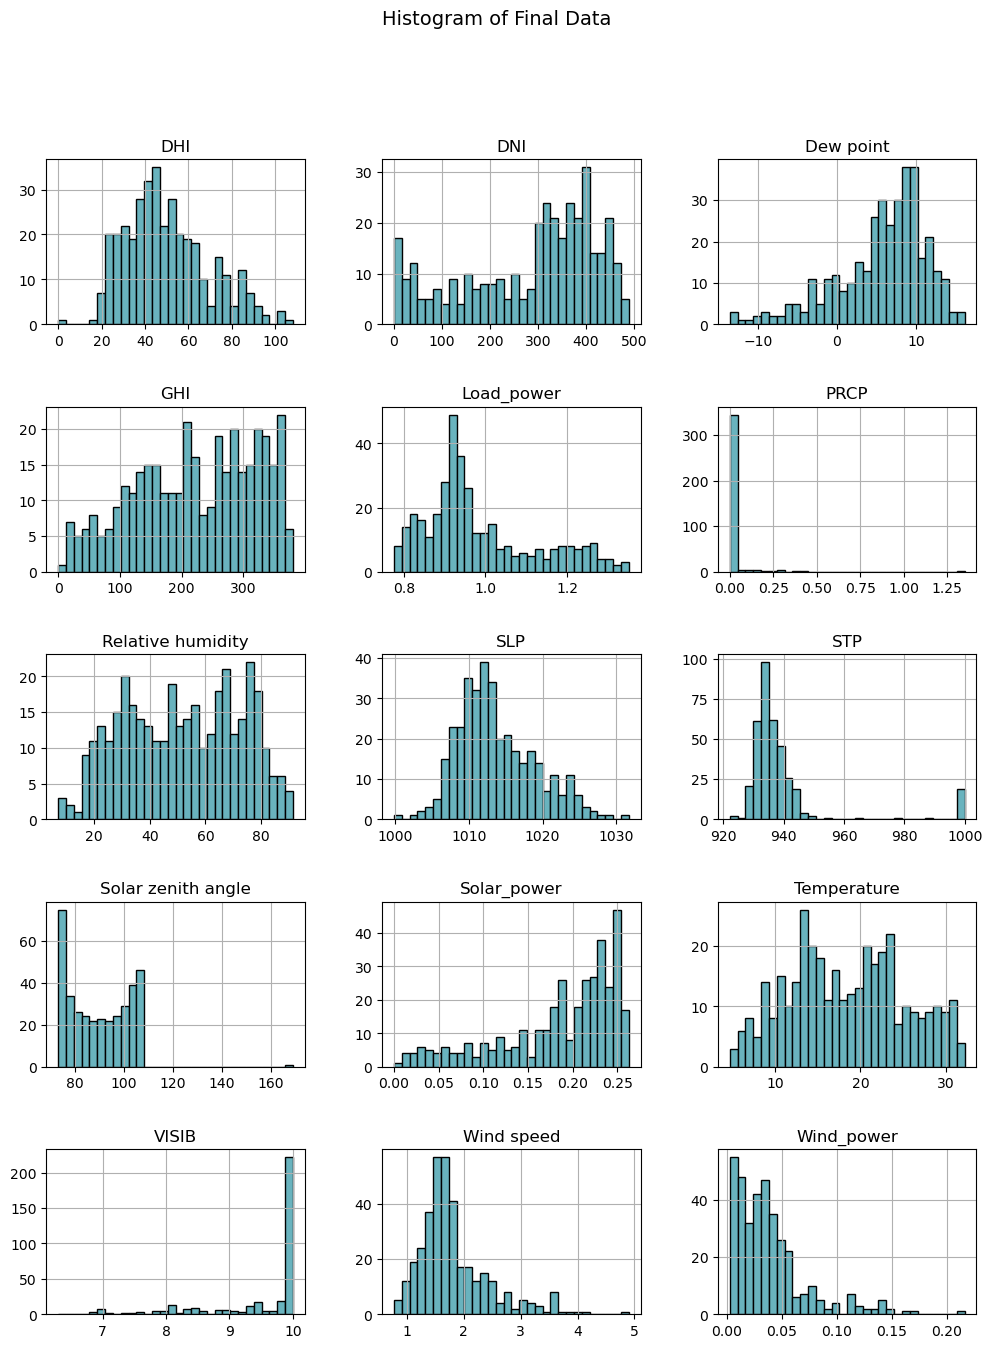

In [22]:
# Histogram plot - FD
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'CAISO_zone_1_2019_TimeFeatures.csv'
df = pd.read_csv(file_path)

# Select numerical columns and exclude specified columns
columns_to_remove = ['Fog', 'Rain/Drizzle', 'Snow/Ice Pellets', 'Thunder', 
                     'Month_sin', 'Month_cos', 'Weekday_sin', 'Weekday_cos']

numeric_cols = df.select_dtypes(include=['number']).columns.difference(columns_to_remove)

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))
axes = axes.flatten()

# Iterate through each numerical column and plot histograms
for i, col in enumerate(numeric_cols):
    df[col].hist(bins=30, ax=axes[i], edgecolor='black', color="#69b3be")
    axes[i].set_title(col)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Title
plt.suptitle("Histogram of Final Data", fontsize=14)

# Save
output_image_path = "E:/Desktop/FD_Histogram.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
print(f"The image has been successfully saved as '{output_image_path}'")

plt.show()

C:\Users\Talia\AppData\Local\Temp\ipykernel_14780\1346427243.py:33: UserWarning: 
The palette list has fewer values (11) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_scaled, orient='v', palette=custom_palette)


The image has been successfully saved as 'E:/Desktop/Standardized_Boxplot_of_FD.png'


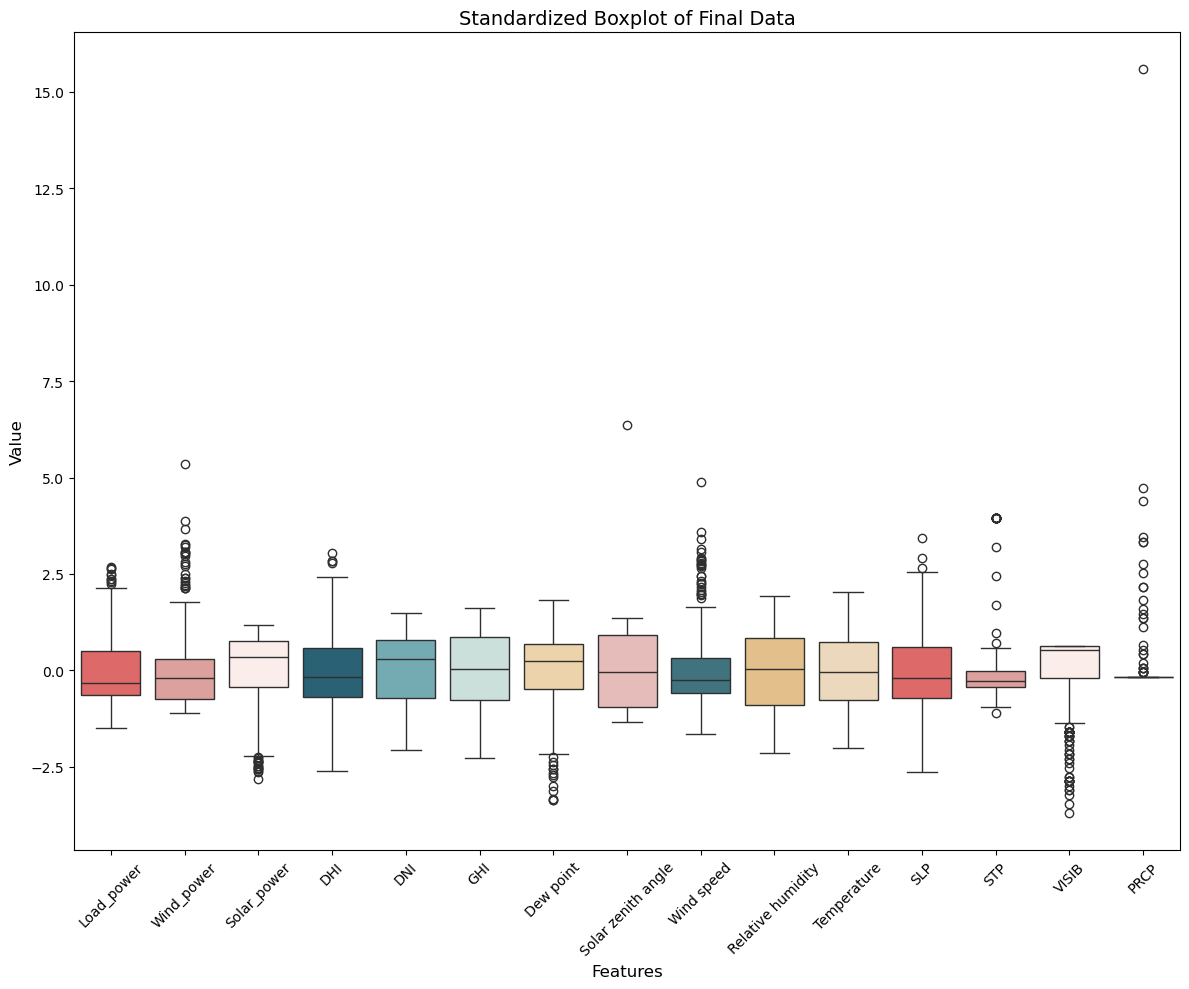

In [23]:
# Boxplot - FD
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

file_path = "CAISO_zone_1_2019_TimeFeatures.csv"
df = pd.read_csv(file_path)

# Ensure the 'time' column is in datetime format
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])

# Select numerical columns and remove specified columns
columns_to_drop = ['Fog', 'Rain/Drizzle', 'Snow/Ice Pellets', 'Thunder', 
                   'Month_sin', 'Month_cos', 'Weekday_sin', 'Weekday_cos']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Standardize data using Z-score
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

# Custom color palette
custom_palette = ['#f05756', '#e69692', '#feece7', '#1e6780', '#69b3be', 
                  '#c8e2dd', '#f8d5a0', '#edb6b3', '#377989', '#f0c27d', '#f4dbb5']

# Plot boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_scaled, orient='v', palette=custom_palette)
plt.title("Standardized Boxplot of Final Data", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Save
output_image_path = "E:/Desktop/Standardized_Boxplot_of_FD.png"
plt.savefig(output_image_path, dpi=300, bbox_inches='tight', format='png')
print(f"The image has been successfully saved as '{output_image_path}'")

plt.show()

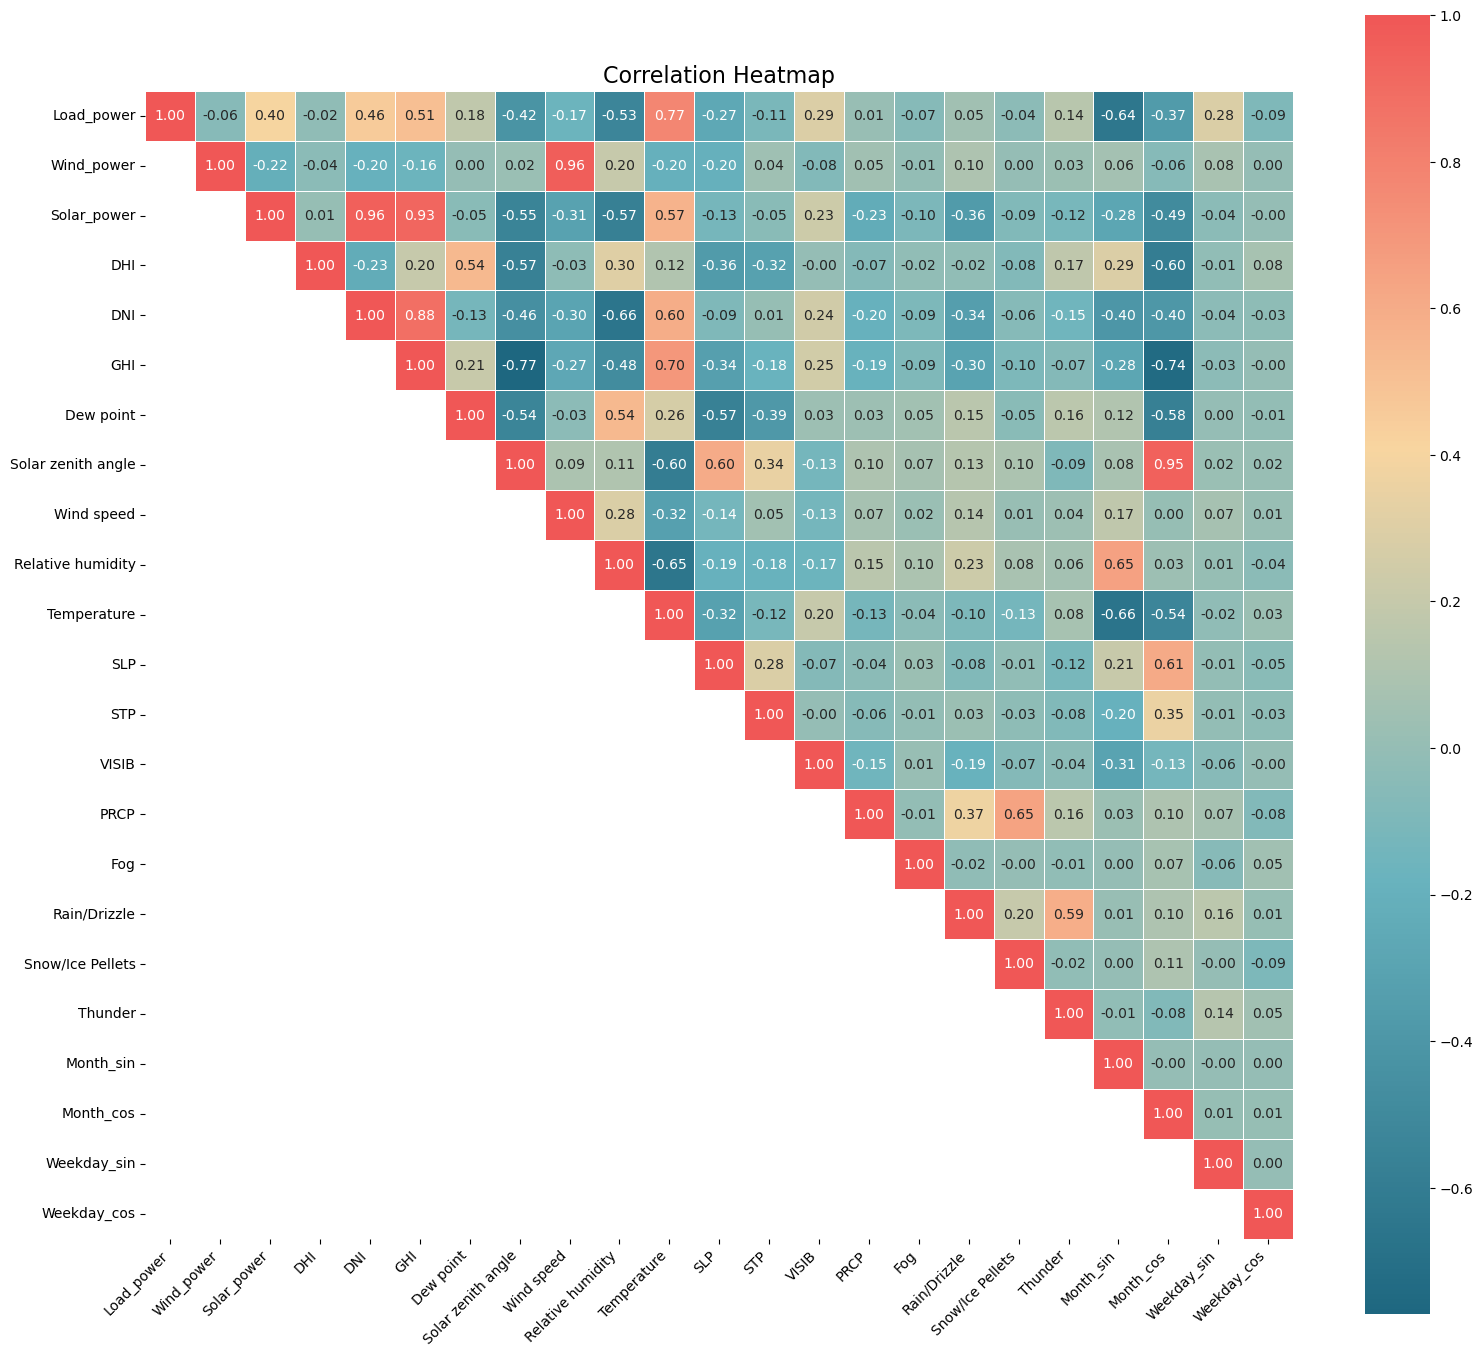

In [24]:
# Correlation Matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

file_path = "CAISO_zone_1_2019_TimeFeatures.csv"
df = pd.read_csv(file_path)

columns_to_drop = ["Date"]
df = df.drop(columns=columns_to_drop, errors='ignore')

# Compute correlation matrix
correlation_matrix = df.corr()

# Create a mask to retain only the upper triangle
mask = np.triu(np.ones(correlation_matrix.shape, dtype=bool))
mask = ~mask

# Custom colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#1e6780", "#69b3be", "#f8d5a0", "#f05756"]
)

# Plot heatmap with mask applied
plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    cbar=True,
    square=True,
    linewidths=0.5
)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10)                           
plt.title("Correlation Heatmap", fontsize=16)  
plt.tight_layout()                               

# Save
plt.savefig("E:/Desktop/Correlation_heatmap.png", dpi=300, bbox_inches='tight', format='png')  

plt.show()